# Errores en la determinación de la posición
## Ejemplo con 2 agentes
Posiciones iniciales
1. Agente 1 (1,1)
2. Agente 2 (5,1)

Consideraré que el agente 1 mide sin error y el agente 2 mide con error las posiciones

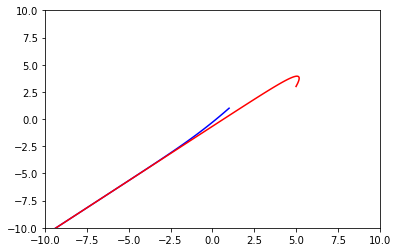

In [1]:
import RobotModels as rob
import numpy as np
import matplotlib.pyplot as plt
import graph_utils as graf
import time
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import robot_plot_utils as rpu

#Posiciones iniciales
pi=np.array([[1,1],[5,3]])
p=np.zeros([2,2])
#Formacion
zstar=np.array([-5,-5])
#Grafo
Z=np.array([1,2])
fig= plt.figure()
p=pi
a1=0.5
a2=1
h=0.1
n=100
p1=np.zeros([n,2])
p1[0,:]=pi[0,:]
p2=np.zeros([n,2])
p2[0,:]=pi[1,:]
p1dot=np.zeros([1,2])
p2dot=np.zeros([1,2])
 # style for plotting line
# set limit for x and y axis
axis =plt.axes(xlim=(-10,10),ylim=(-10,10))

agente1, = axis.plot([],[],c='b')
agente2, = axis.plot([],[],c='r')
def init():
    agente1.set_data([],[])
    agente2.set_data([],[])
    return agente1, agente2
    
for i in range(n-1):
    p1dot=-(a1*(p1[i,:]-p2[i,:])-zstar)
    x1dot,y1dot,theta1dot=rob.integrator_point_model(p1dot[0],p1dot[1])
    p1[i+1,0]=p1[i,0]+h*x1dot
    p1[i+1,1]=p1[i,1]+h*y1dot
    p2dot=-(a2*(p2[i,:]-p1[i,:])+zstar)
    x2dot,y2dot,theta2dot=rob.integrator_point_model(p2dot[0],p2dot[1])
    p2[i+1,0]=p2[i,0]+h*x2dot
    p2[i+1,1]=p2[i,1]+h*y2dot

x1, y1, x2, y2 = [], [], [], []

def animate(i):
    x1.append((p1[i,0]))
    y1.append((p1[i,1]))
    x2.append((p2[i,0]))
    y2.append((p2[i,1]))
    agente1.set_data(x1,y1)
    agente2.set_data(x2,y2)
    return (agente1, agente2)
    #axes.plot(x1,y1,color="blue")
    #axes.plot(x2,y2,color="red")

anim = FuncAnimation(fig=fig,func=animate,init_func=init,frames=100,interval=30,blit=True)
# converting to an html5 video 
videowriter = PillowWriter(fps=30)

anim.save("prueba.gif", writer=videowriter)
  
# draw the animation 
#display.display(html) 
plt.show()
plt.close() 

Vamos ahora a replicar el ejemplo del paper de Héctor con 9 agentes


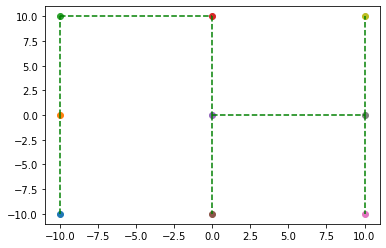

In [2]:
#Posiciones iniciales
pi=np.array([[-10,-10],[-10,0],[-10 ,10],[0,10],[0,0],[0,-10],[10,-10],[10,0],[10,10]])
p=np.zeros([2,9])
numnodos,m=np.shape(pi)
#Formacion
zstar=np.array([-5,-5])
#Grafo
Z=np.array([[1,2],[2,3],[3,4],[4,5],[5,6],[5,8],[8,7],[8,9]])
numarcos,m=np.shape(Z)
# Scale factors
a = np.random.rand(1,9)
#print(a)
#Misalignments in radians
rm=10*np.pi/180
r=np.zeros([1,9])
r=2*rm*np.random.rand(1,9)-rm*np.ones([1,9])
#print(r)
n,m= np.shape(pi)
for i in range(n):
    plt.plot(pi[i,0],pi[i,1],'o')

rpu.dibuja_grafo_2D(pi,Z)

In [18]:
m,n=np.shape(a)
Da=np.diag(a[0,:])
#print(Da)
j=0
R=np.zeros([n*2,2])
for i in range(n):
    R[j,0]=np.cos(r[0,i])
    R[j,1]=np.sin(r[0,i])
    R[j+1,0]=-np.sin(r[0,i])
    R[j+1,1]=np.cos(r[0,i])
    j+=2
Rt=np.transpose(R)

Construimos la matriz Dx $D_x=D_a \otimes I_m \dot D_R$

In [19]:
Im=np.eye(2)
Da_bar=np.kron(Da,Im)
i=n*4
Dr=np.zeros([2,i])
Dr[0,0:2*n]=Rt[0,:]
Dr[1,2*n:i]=Rt[1,:]
#print(Dr)
Dx=np.dot(Da_bar,Dr)
#print(Dx)
pesos=np.ones([numnodos,numnodos])
L=graf.matriz_laplaciana(Z,pesos,numnodos,numarcos)
#print(L)
Lbar=np.kron(L,Im)
M=-np.dot(Dx,Lbar)
pstack=graf_utils.stack(pi)
#pdot=np.dot(M,p)^

[[ 0.99577268 -0.09185194  0.99992754 -0.01203781  0.99782371 -0.0659382
   0.98955028  0.14418819  0.99967397  0.02553344  0.99190301  0.1269977
   0.99974797  0.02244967  0.99746025  0.07122538  0.99719451  0.07485397
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.09185194  0.99577268  0.01203781  0.99992754  0.0659382   0.99782371
  -0.14418819  0.98955028 -0.02553344  0.99967397 -0.1269977   0.99190301
  -0.02244967  0.99974797 -0.07122538  0.99746025 -0.07485397  0.99719451]]


ValueError: shapes (18,18) and (2,36) not aligned: 18 (dim 1) != 2 (dim 0)